In [81]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")


In [82]:
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')
#CustomerDemographic = pd.read_excel(data, header=0, sheet_name='CustomerDemographic', index_col=0)
CustomerDemographic.head()

/tmp/ipykernel_30/693758667.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  NewCustomerList = pd.read_excel(data, 'NewCustomerList')
/tmp/ipykernel_30/693758667.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [83]:
#clean meaningless data and transform the inconsistency 
CustomerDemographic = CustomerDemographic.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
CustomerDemographic['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
CustomerDemographic['gender'].replace('M', 'Male', inplace=True)
CustomerDemographic['gender'].replace('U', 'Unknown', inplace=True)
# transfrom categorical variables 'deceased_indicator' and 'owns_car' to dummy variables
CustomerDemographic['deceased_indicator'].replace(['N'], 0, inplace=True)
CustomerDemographic['deceased_indicator'].replace(['Y'], 1, inplace=True)
CustomerDemographic['owns_car'].replace('Yes', 1, inplace=True)
CustomerDemographic['owns_car'].replace('No', 0, inplace=True)
#removing the rows where the 'DOB' value is equal to the minimum 'DOB' value could be to filter out any 
#potential outliers or missing values that might be present in the data.
CustomerDemographic = CustomerDemographic[CustomerDemographic['DOB'] != CustomerDemographic.DOB.min()]


In [84]:
#only keep customer that has pucharse potential
CustomerDemographic[CustomerDemographic['deceased_indicator'] == 0]
CustomerDemographic = CustomerDemographic.drop(['deceased_indicator'], axis=1)
#returns a new DataFrame with any missing or NaN (not a number) values removed
CustomerDemographic_clean = CustomerDemographic.dropna()
CustomerDemographic_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [85]:
#there is no age variable in the dataset, so I used the current datatime - DOB to get the age of each customer and conduct a extra age class for better customer analysis later
CustomerDemographic_clean['age'] = (dt.datetime.now() - CustomerDemographic_clean['DOB']) / np.timedelta64(1, 'Y')
CustomerDemographic_clean['age_class'] = ((round(CustomerDemographic_clean['age'] / 10)) * 10).astype(int)
CustomerDemographic_clean.head()

/tmp/ipykernel_30/232532051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerDemographic_clean['age'] = (dt.datetime.now() - CustomerDemographic_clean['DOB']) / np.timedelta64(1, 'Y')
/tmp/ipykernel_30/232532051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerDemographic_clean['age_class'] = ((round(CustomerDemographic_clean['age'] / 10)) * 10).astype(int)


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,69.463649,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,42.284446,40
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,69.189858,70
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,61.488125,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,56.535252,60


In [86]:
CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [87]:
CustomerAddress['state'].replace('New South Wales', 'NSW', inplace=True)
CustomerAddress['state'].replace('Victoria', 'VIC', inplace=True)
CustomerAddress_clean = CustomerAddress.dropna()
CustomerAddress_clean.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [88]:
demo_CustomerAddress = pd.merge(CustomerDemographic_clean, CustomerAddress_clean, left_index=True, right_index=True)
demo_CustomerAddress= demo_CustomerAddress.dropna()
demo_CustomerAddress.head()

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,69.463649,70,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,42.284446,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,69.189858,70,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,61.488125,60,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,56.535252,60,7,4 Delaware Trail,2210,NSW,Australia,9


In [89]:
#Transactions = pd.read_excel(data, header=0, sheet_name='Transactions', index_col=0)
Transactions = Transactions.sort_values('customer_id')
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [90]:
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [91]:
Transactions.duplicated().sum()

0

In [92]:
Transactions.shape

(20000, 13)

In [93]:
# convert a column of numerical values representing days since 1900-01-01 to a datetime object with a specific date format, which can be more useful for analysis and visualization
Transactions['product_first_sold_date'] = pd.TimedeltaIndex(Transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [94]:
Transactions_clean = Transactions.dropna()
Transactions_clean.shape

(19445, 13)

In [95]:
Transactions_clean['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [96]:
most_recent_purchase = Transactions_clean['transaction_date'].max()
Transactions_clean['last_purchase_days_ago'] = most_recent_purchase - Transactions_clean['transaction_date']
Transactions_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
Transactions_clean['profit'] = Transactions_clean['list_price'] - Transactions_clean['standard_cost']
Transactions_clean.head()

/tmp/ipykernel_30/3088450026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transactions_clean['last_purchase_days_ago'] = most_recent_purchase - Transactions_clean['transaction_date']
/tmp/ipykernel_30/3088450026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transactions_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
/tmp/ipykernel_30/3088450026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [97]:
Transactions_clean[Transactions_clean['last_purchase_days_ago'] > 365].shape

(0, 15)

In [98]:
#employed RFM analysis
rfm_df = Transactions_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfm_df.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)
rfm_df.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [99]:
rfm_df.shape

(3492, 3)

In [100]:
quartiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [101]:
def r_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def fm_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [102]:
rfmSeg = rfm_df
rfmSeg['r_score'] = rfmSeg['recency'].apply(r_score, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(fm_score, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(fm_score, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [103]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'].map(str) + rfmSeg['f_score'].map(str) + rfmSeg['m_score'].map(str)
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,113
2,128.0,3,2226.26,4,4,2,442,442
3,102.0,7,3290.21,4,3,3,433,433
4,195.0,2,220.57,4,4,4,444,444
5,16.0,6,2394.94,1,3,2,132,132


In [104]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [105]:
def rfmClass(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(rfmClass, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,113,silver
2,128.0,3,2226.260000,4,4,2,442,442,basic
3,102.0,7,3290.210000,4,3,3,433,433,basic
4,195.0,2,220.570000,4,4,4,444,444,basic
5,16.0,6,2394.940000,1,3,2,132,132,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,344,basic
3498,127.0,6,3147.330000,4,3,3,433,433,basic
3499,51.0,7,4955.250000,3,3,1,331,331,basic


In [106]:
dfw_addr_tran = pd.merge(rfmSeg, demo_CustomerAddress, left_index=True, right_index=True)
dfw_addr_tran.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [107]:
dfw_addr_tran.shape

(2853, 25)

<AxesSubplot:xlabel='r_score'>

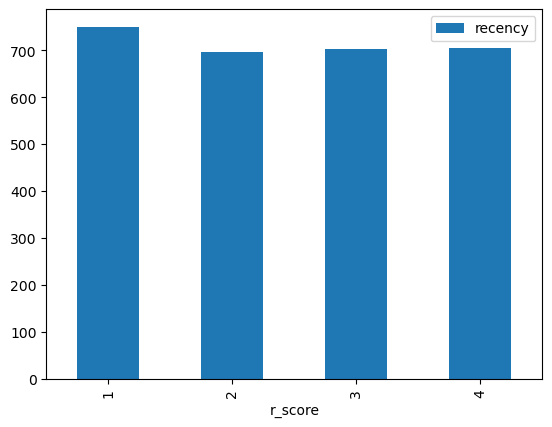

In [108]:
dfw_addr_tran.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

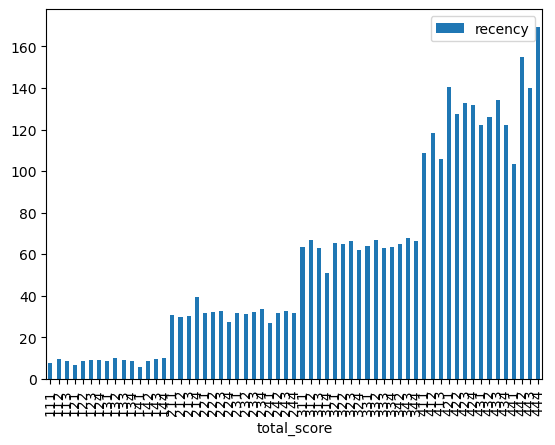

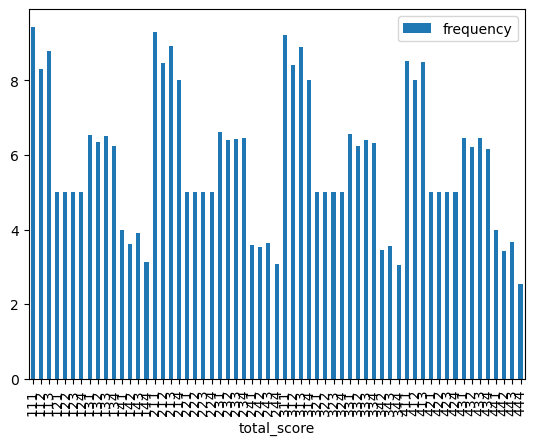

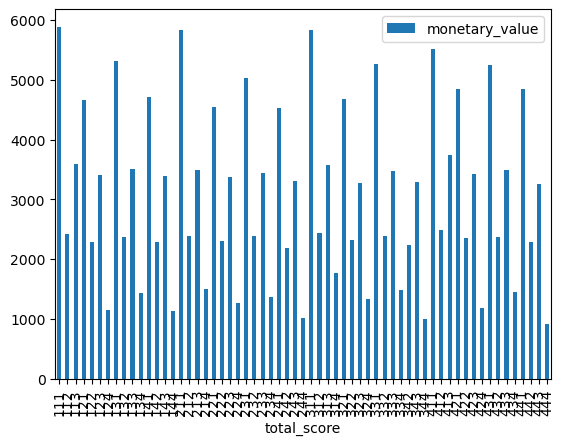

In [109]:
dfw_addr_tran.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
dfw_addr_tran.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
dfw_addr_tran.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

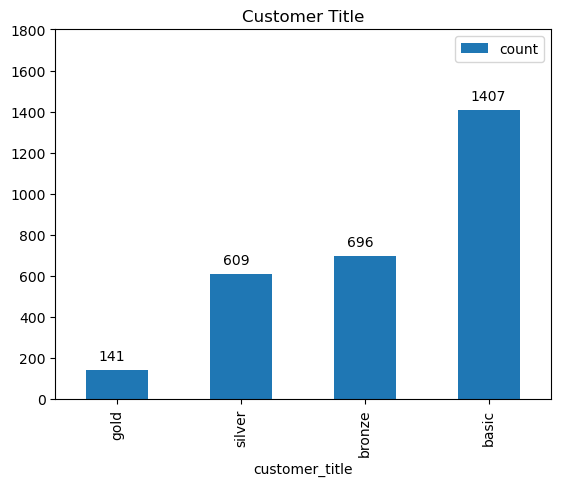

In [110]:
customer_titles_df = dfw_addr_tran.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

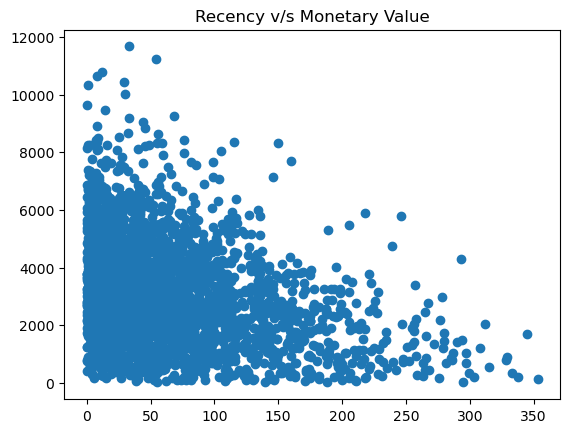

In [111]:
plt.scatter(dfw_addr_tran['recency'],dfw_addr_tran['monetary_value'])
plt.title('Recency v/s Monetary Value')
plt.show()

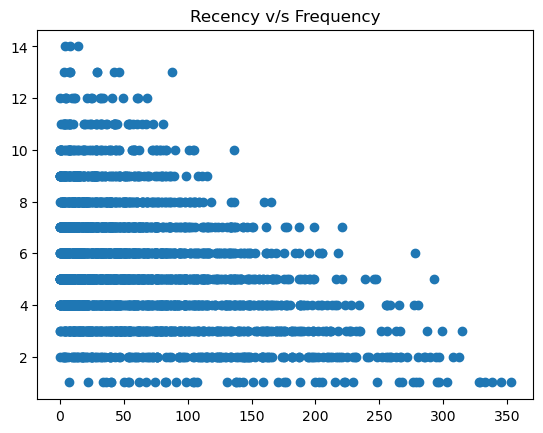

In [112]:
plt.scatter(dfw_addr_tran['recency'], dfw_addr_tran['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

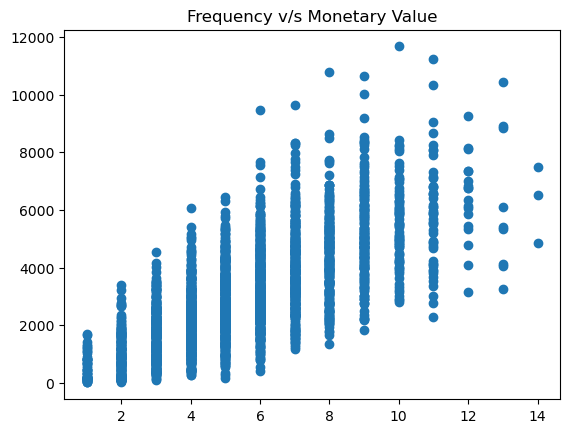

In [113]:
plt.scatter(dfw_addr_tran['frequency'], dfw_addr_tran['monetary_value'])
plt.title('Frequency v/s Monetary Value')
plt.show()

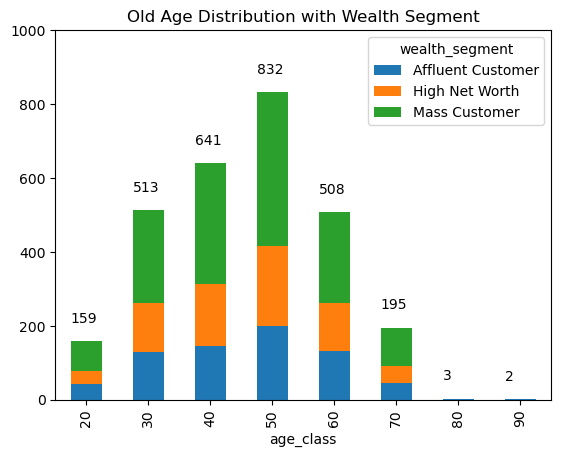

In [114]:
dfw_addr_tran.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(dfw_addr_tran.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with Wealth Segment')
plt.show()

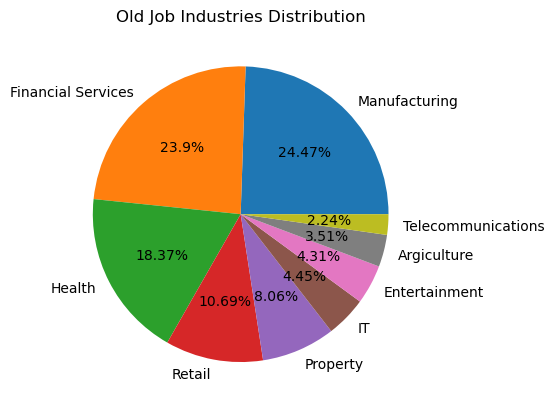

In [115]:
dfw_addr_tran.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries Distribution')
plt.ylabel('')
plt.show()

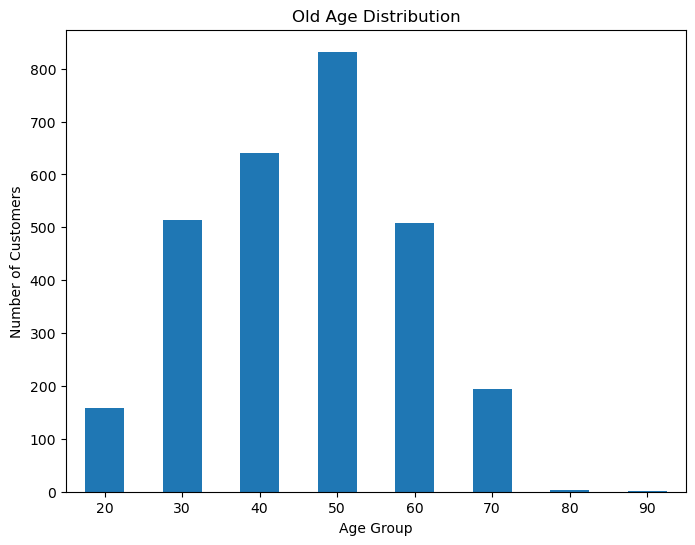

In [116]:
age_groups = dfw_addr_tran.groupby('age_class').size()

# Plot the age distribution bar chart
age_groups.plot(kind='bar', figsize=(8,6))
plt.title('Old Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

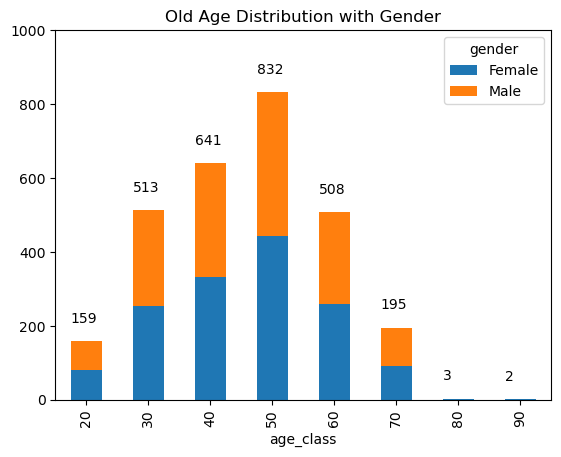

In [117]:
dfw_addr_tran.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(dfw_addr_tran.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with Gender')
plt.show()

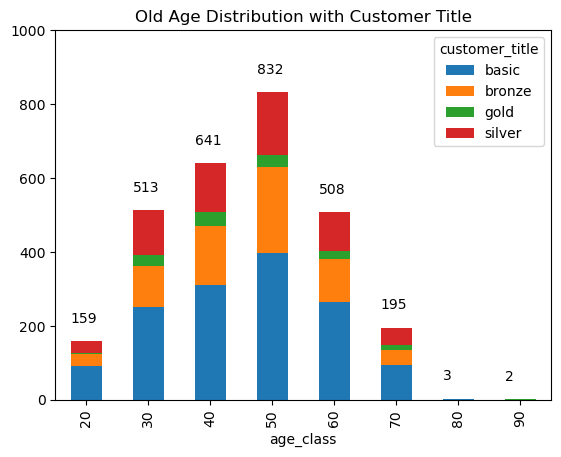

In [118]:
dfw_addr_tran.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(dfw_addr_tran.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with Customer Title')
plt.show()

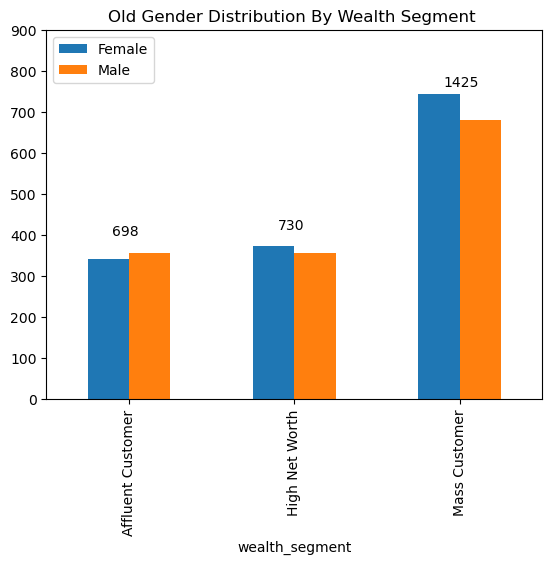

In [119]:
dfw_addr_tran.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(dfw_addr_tran.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender Distribution By Wealth Segment ')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

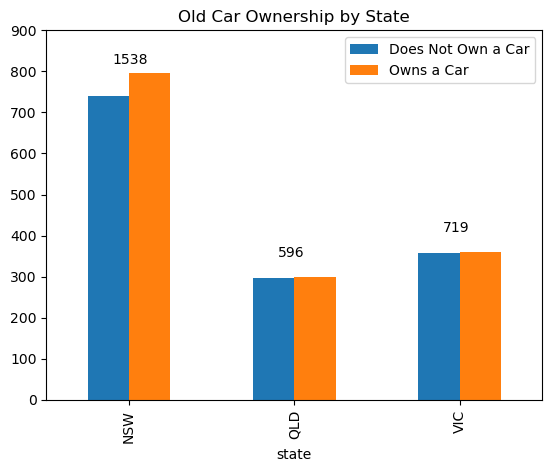

In [120]:
dfw_addr_tran.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(dfw_addr_tran.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

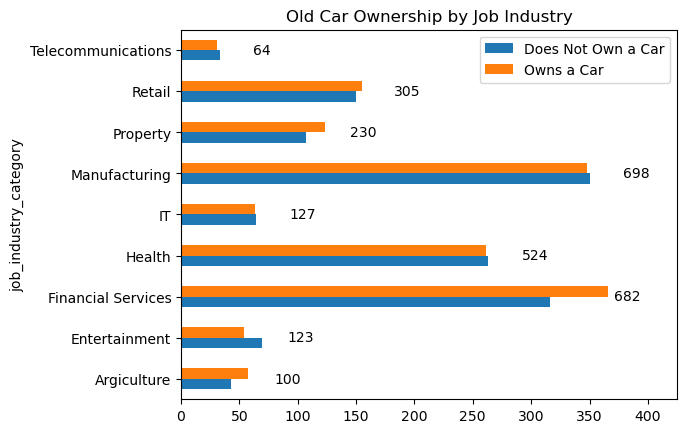

In [121]:
dfw_addr_tran.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(dfw_addr_tran.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

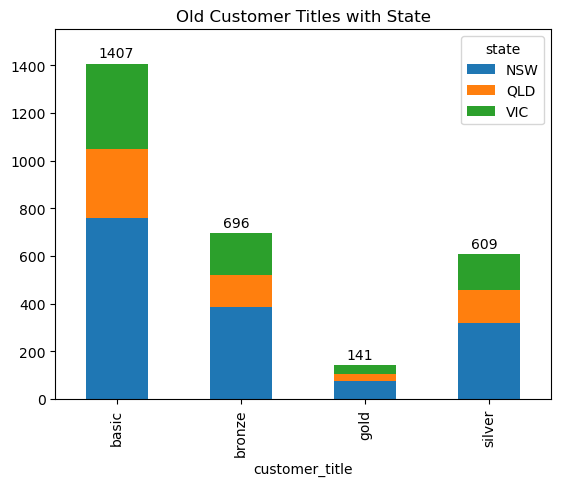

In [122]:
dfw_addr_tran.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(dfw_addr_tran.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Old Customer Titles with State')
plt.show()

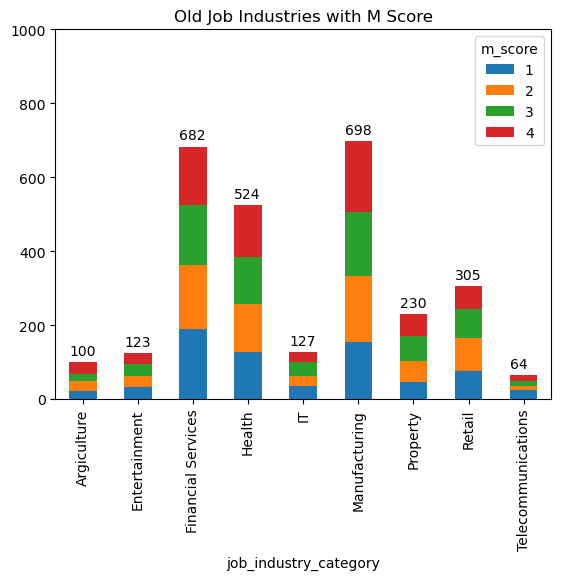

In [123]:
dfw_addr_tran.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(dfw_addr_tran.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Job Industries with M Score')
plt.show()

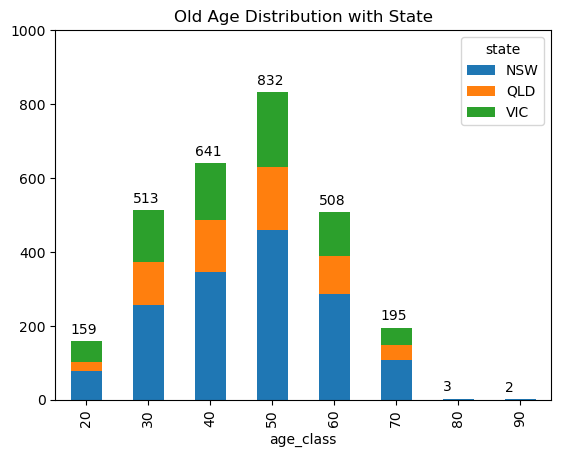

In [124]:
dfw_addr_tran.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(dfw_addr_tran.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [125]:
c = dfw_addr_tran.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c


,count
gender,
Female,69741
Male,69597


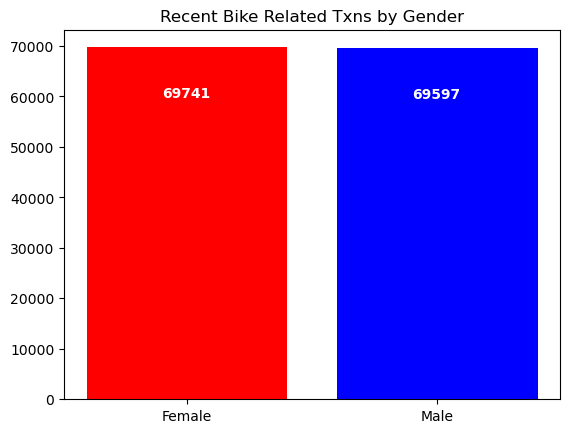

In [126]:
labels = ['Female', 'Male']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

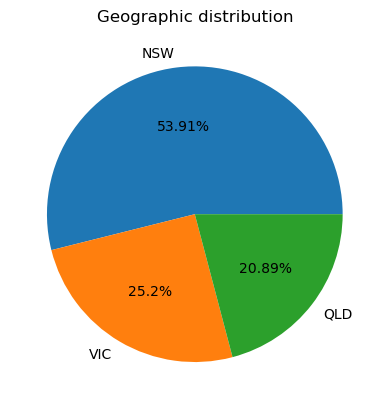

In [127]:
dfw_addr_tran.state.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Geographic distribution')
plt.ylabel('')
plt.show()

In [128]:
c = dfw_addr_tran.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1407
bronze,696
gold,141
silver,609


In [129]:
c = dfw_addr_tran.groupby(['job_industry_category','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
job_industry_category customer_title       
Argiculture           basic              54
                      bronze             25
                      gold                1
                      silver             20
Entertainment         basic              61
                      bronze             36
                      gold                4
                      silver             22
Financial Services    basic             319
                      bronze            166
                      gold               40
                      silver            157
Health                basic             256
                      bronze            133
                      gold               24
                      silver            111
IT                    basic              64
                      bronze             34
                      gold                5
                      silver             24
Manufacturing         basic             337
                      bronze            173
                      gold               36
                      silver            152
Property              basic             126
                      bronze             50
                      gold                8
                      silver             46
Retail                basic             152
                      bronze             65
                      gold               17
                      silver             71
Telecommunications    basic              38
                      bronze             14
                      gold                6
                      silver              6

In [130]:
c = dfw_addr_tran.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
111,141
112,161
113,213
121,231
122,278
...,...
434,2440
441,2446
442,2554


In [131]:
new_cust_list = pd.read_excel(data, header=0, sheet_name='NewCustomerList')
new_cust_list.head()

/tmp/ipykernel_30/3298533646.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_cust_list = pd.read_excel(data, header=0, sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.93,0.9300,1.162500,0.988125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.10,1.1000,1.100000,1.100000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.53,0.6625,0.662500,0.662500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.87,0.8700,1.087500,1.087500,4,4,1.703125


In [132]:
new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [133]:
new_cust_list.duplicated().sum()

0

In [134]:
new_cust_list.shape

(1000, 23)

In [135]:
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.93,0.9300,1.162500,0.988125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.10,1.1000,1.100000,1.100000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.53,0.6625,0.662500,0.662500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.87,0.8700,1.087500,1.087500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.85,0.8500,0.850000,0.850000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.94,0.9400,1.175000,0.998750,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.57,0.7125,0.712500,0.712500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.58,0.7250,0.725000,0.616250,997,997,0.357000


In [136]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

/tmp/ipykernel_30/326135932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
/tmp/ipykernel_30/326135932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.97,1.2125,1.515625,1.288281,1,1,1.718750,65.715454,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.93,0.9300,1.162500,0.988125,1,1,1.718750,53.022517,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.10,1.1000,1.100000,1.100000,1,1,1.718750,48.587108,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.53,0.6625,0.662500,0.662500,4,4,1.703125,44.168126,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.87,0.8700,1.087500,1.087500,4,4,1.703125,57.520898,60


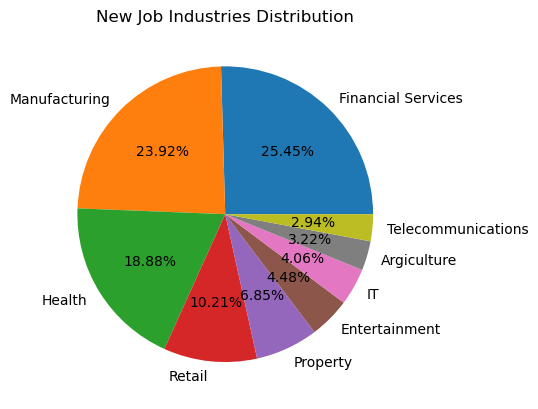

In [137]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries Distribution')
plt.ylabel('')
plt.show()

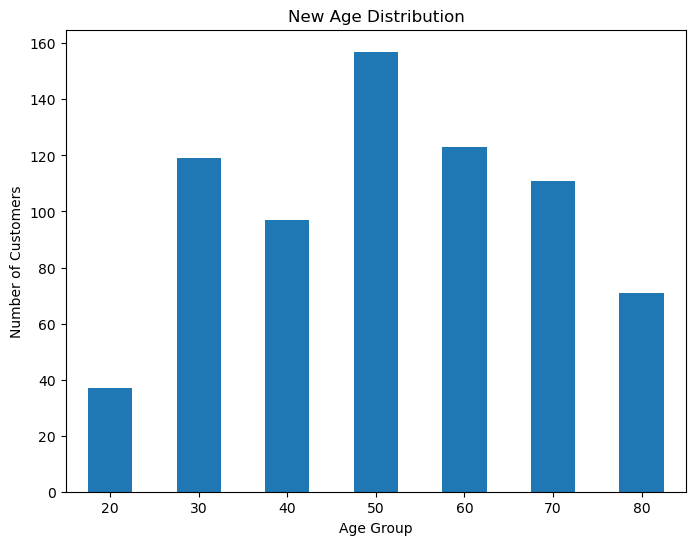

In [138]:
age_groups = new_cust_list_clean.groupby('age_class').size()

# Plot the age distribution bar chart
age_groups.plot(kind='bar', figsize=(8,6))
plt.title('New Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

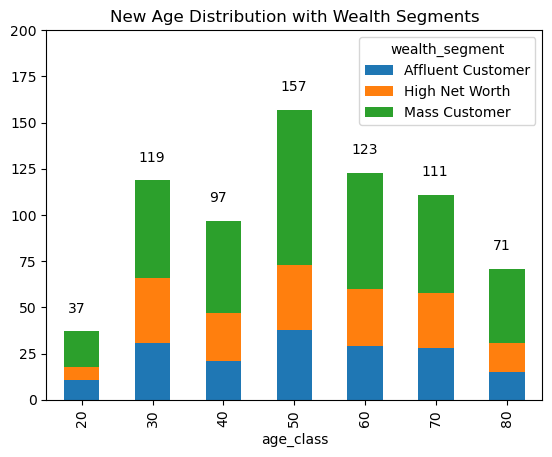

In [139]:
new_cust_list_clean.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with Wealth Segments')
plt.show()

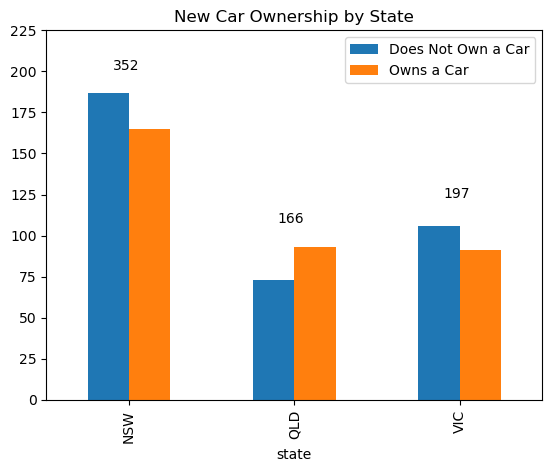

In [140]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

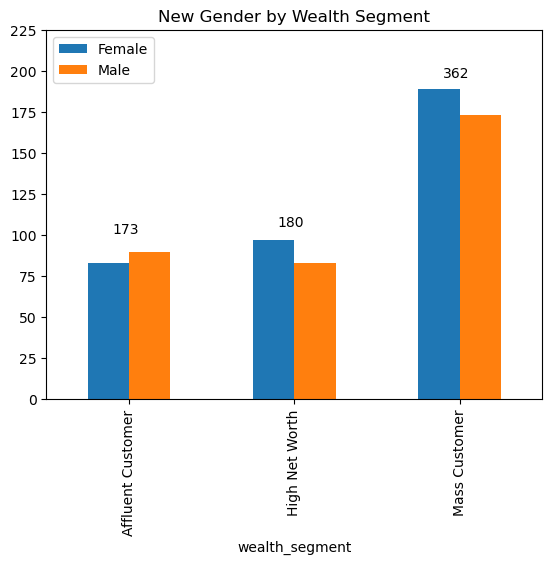

In [141]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

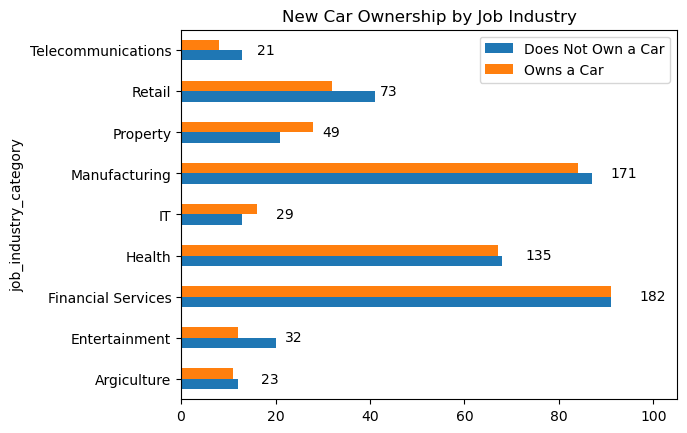

In [142]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

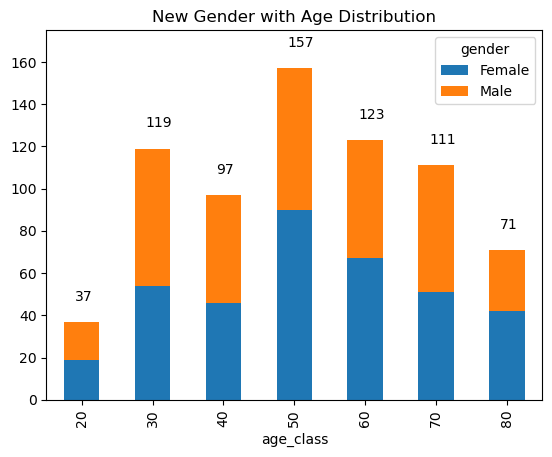

In [143]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [144]:
dfw_addr_tran['customer_segment'] = dfw_addr_tran['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
dfw_addr_tran

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,113,silver,2,...,16.0,42.284446,40,2,6 Meadow Vale Court,2153,NSW,Australia,10,NaN
2,128.0,3,2226.26,4,4,2,442,442,basic,3,...,15.0,69.189858,70,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN
3,102.0,7,3290.21,4,3,3,433,433,basic,4,...,7.0,61.488125,60,5,17979 Del Mar Point,2448,NSW,Australia,4,NaN
5,16.0,6,2394.94,1,3,2,132,132,silver,6,...,13.0,56.535252,60,7,4 Delaware Trail,2210,NSW,Australia,9,NaN
6,64.0,5,3946.55,3,2,3,323,323,basic,7,...,11.0,47.097686,50,8,49 Londonderry Lane,2650,NSW,Australia,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,442,basic,3497,...,18.0,36.907196,40,3501,16 Carberry Pass,2119,NSW,Australia,11,NaN
3497,52.0,3,1648.32,3,4,4,344,344,basic,3498,...,5.0,27.406659,30,3502,12 Elgar Place,2155,NSW,Australia,10,NaN
3498,127.0,6,3147.33,4,3,3,433,433,basic,3499,...,7.0,43.784819,40,3503,8749 Menomonie Point,2122,NSW,Australia,11,NaN
3499,51.0,7,4955.25,3,3,1,331,331,basic,3500,...,17.0,55.691976,60,3504,18072 American Parkway,3195,VIC,Australia,10,NaN


In [145]:
top_1000 = dfw_addr_tran.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
719,11.0,8,4227.84,1,1,1,111,111,gold,720,...,6.0,91.435352,90,724,09 Bartelt Lane,2190,NSW,Australia,8,NaN
768,5.0,9,5580.57,1,1,1,111,111,gold,769,...,12.0,61.252665,60,773,88 Bay Drive,4305,QLD,Australia,3,NaN
2434,0.0,9,6874.53,1,1,1,111,111,gold,2435,...,14.0,61.630497,60,2439,75 Westerfield Park,4570,QLD,Australia,1,NaN
3420,5.0,11,6808.18,1,1,1,111,111,gold,3421,...,18.0,60.283446,60,3425,5 Anhalt Court,3122,VIC,Australia,7,NaN
144,6.0,8,4888.02,1,1,1,111,111,gold,145,...,4.0,25.689991,30,149,939 Coleman Pass,4509,QLD,Australia,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,31.0,5,3226.46,2,2,3,223,223,bronze,874,...,1.0,21.900728,20,878,1 Springview Place,4800,QLD,Australia,5,NaN
3095,36.0,5,2799.49,2,2,3,223,223,bronze,3096,...,10.0,49.753456,50,3100,07 Loeprich Junction,2101,NSW,Australia,11,NaN
3394,19.0,5,4073.20,2,2,3,223,223,bronze,3395,...,3.0,29.944699,30,3399,2 Monterey Terrace,2120,NSW,Australia,9,NaN
1314,27.0,5,2894.17,2,2,3,223,223,bronze,1315,...,12.0,49.764408,50,1319,9 Dawn Court,4128,QLD,Australia,2,NaN


In [149]:
writer = pd.ExcelWriter('kpmg_cleaned_data.xlsx')
dfw_addr_tran.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()
print(pd.ExcelFile('kpmg_cleaned_data.xlsx').sheet_names)


['Dataset', 'Top 1000']


In [153]:
Top_1000 = pd.read_excel(writer, 'Top 1000')
Top_1000.head()
Top_1000.columns

Index(['Unnamed: 0', 'recency', 'frequency', 'monetary_value', 'r_score',
       'f_score', 'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'customer_segment'],
      dtype='object')

In [157]:
high_val_customer=Top_1000.loc[:,['age', 'state', 'job_industry_category', 'gender','wealth_segment', 'past_3_years_bike_related_purchases']]

In [158]:
high_val_customer.head()

,age,state,job_industry_category,gender,wealth_segment,past_3_years_bike_related_purchases
0,91.435352,NSW,Retail,Male,Affluent Customer,67
1,61.252665,QLD,IT,Male,Mass Customer,65
2,61.630497,QLD,Manufacturing,Female,Mass Customer,69
3,60.283446,VIC,Health,Female,Affluent Customer,60
4,25.689991,QLD,Financial Services,Male,Mass Customer,33
